# Long Term Stock Price growth prediction using NLP on 10- K Financial Reports

Document Details – The details and description provided in this document refers to the analysis, EDA, corpus details of the solution. Further, the document also describes the approach and the thought process to solve the problem statement. 
Intended Audience – The document is intended for the data scientists, professors and other data science faculty at INSOFE, Bangalore. 


#### Abstract 
We investigate the importance of text analysis to analyse the long term stock performance of a company. In particular, we introduce a system that forecasts the stock performance in response to the financial events that are reported in the 1-k documents. Our results indicate that using text boost predictions accuracy. We shall analyse how combined technique of using NLP and model building using machine learning technique can overall boost the prediction accuracy and predict the impact for a long term stock performance of a company. 


In [ ]:
#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import urllib.request as url 
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string

In [2]:
first = pd.read_csv('train_first_half.csv', encoding='utf-8')

In [3]:
first.tail()

,Unnamed: 0,ticker,cik,filing_date,X10k_link,long_term_outlook,tenk_data
866,867,RSG,1060391,2003-03-27,https://www.sec.gov/Archives/edgar/data/106039...,1,- -------------------------------------------...
867,868,LRCX,707549,2015-08-13,https://www.sec.gov/Archives/edgar/data/707549...,1,Table of Contents UNITED STATES SECURITIES AN...
868,869,FSLR,1274494,2007-03-16,https://www.sec.gov/Archives/edgar/data/127449...,1,Table of Contents UNITED STATES SECURITIES AN...
869,870,PNC,713676,2013-03-01,https://www.sec.gov/Archives/edgar/data/713676...,1,Table of Contents UNITED STATES SECURITIES AN...
870,871,DE,315189,2015-12-18,https://www.sec.gov/Archives/edgar/data/315189...,0,UNITED STATES SECURITIES AND EXCHANGE COMMISS...


In [ ]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('train_first_half.csv', encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in open('train_first_half.csv'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [4]:
second = pd.read_csv('train_second_half.csv', encoding='utf-8')


In [5]:
third = pd.read_csv('train_third_half.csv', encoding='utf-8')

In [6]:
second.tail()

,Unnamed: 0,ticker,cik,filing_date,X10k_link,long_term_outlook,tenk_data
234,1235,QCOM,804328,2012-11-07,https://www.sec.gov/Archives/edgar/data/804328...,1,\t \t Table of Contents UNITED STATES SECURIT...
235,1236,ETN,1551182,2014-02-26,https://www.sec.gov/Archives/edgar/data/155118...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...
236,1237,WM,823768,2006-02-21,https://www.sec.gov/Archives/edgar/data/823768...,1,\t \t Table of Contents UNITED STATES SECURIT...
237,1238,PFE,78003,2004-03-10,https://www.sec.gov/Archives/edgar/data/78003/...,0,Table of Contents SECURITIES AND EXCHANGE COM...
238,1239,L,60086,2013-02-22,https://www.sec.gov/Archives/edgar/data/60086/...,1,Table of Contents SECURITIES AND EXCHANGE COM...


In [7]:
third.head()

,Unnamed: 0,ticker,cik,filing_date,X10k_link,long_term_outlook,tenk_data
0,1241,MTB,36270,2007-02-23,https://www.sec.gov/Archives/edgar/data/36270/...,0,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
1,1242,NE,1458891,2015-02-27,https://www.sec.gov/Archives/edgar/data/145889...,0,Table of Contents UNITED STATES SECURITIES AN...
2,1243,MHK,851968,2016-02-29,https://www.sec.gov/Archives/edgar/data/851968...,1,Table of Contents UNITED STATES SECURITIES AN...
3,1244,PEP,77476,2001-03-15,https://www.sec.gov/Archives/edgar/data/77476/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...
4,1245,IBM,51143,1995-03-28,https://www.sec.gov/Archives/edgar/data/51143/...,1,No. 1-1183 SECURITIES AND EXCHANGE COMMISSION...


In [8]:
df = pd.concat([first,second,third])

In [9]:
df.shape

(1328, 7)

## Data Preprocessing

Drop the columns ticker and Unnamed: 0. 

Ticker and cik are both indicative of the company name, so we drop ticker.

In [10]:
df = df.drop(columns = ['ticker', 'Unnamed: 0'])

In [11]:
df.head()

,cik,filing_date,X10k_link,long_term_outlook,tenk_data
0,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...
1,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...
2,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,\t \t Table of Contents UNITED STATES SECURIT...
3,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,1 - -----------------------------------------...
4,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,Table of Contents SECURITIES AND EXCHANGE COM...


In [12]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_punctuation(text):
    for c in string.punctuation:
        text = text.replace(c,"")
    return text
  
def remove_digits(text):
    return re.sub('[\d%/$]', '', text)
  
def to_upper_case(text):
    text = text.upper()
    return text
  
def remove_extra_hyphens(text):
    text = re.sub('-+', ' ', text)
    return text

In [13]:
def clean_text(text):
    text = remove_accented_chars(text).replace('\\n', '').replace('\t', '')
    text = remove_digits(text)
    text =  remove_extra_hyphens(text)
    text = remove_punctuation(text)
    text = to_upper_case(text)
    #text = text.replace('\\n', '').replace('\\t', '')
    return text

In [14]:
cleaned_data_list = []
for i in df['tenk_data']:
    cleaned_data_list.append(clean_text(i))

In [15]:
df['cleaned_data'] = cleaned_data_list

In [16]:
df.head()

,cik,filing_date,X10k_link,long_term_outlook,tenk_data,cleaned_data
0,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...
1,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...
2,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,\t \t Table of Contents UNITED STATES SECURIT...,TABLE OF CONTENTS UNITED STATES SECURITIES ...
3,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,1 - -----------------------------------------...,UNITED STATES SECURITIES AND EXCHANG...
4,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,Table of Contents SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...


## Tokenize

In [17]:
token_text = []

for i in df['cleaned_data']:
    token_text.append(word_tokenize(i))

In [18]:
df['token_data'] = token_text

In [19]:
df.head()

,cik,filing_date,X10k_link,long_term_outlook,tenk_data,cleaned_data,token_data
0,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
1,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
2,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,\t \t Table of Contents UNITED STATES SECURIT...,TABLE OF CONTENTS UNITED STATES SECURITIES ...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI..."
3,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,1 - -----------------------------------------...,UNITED STATES SECURITIES AND EXCHANG...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
4,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,Table of Contents SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG..."


In [20]:
df['word_count_token'] = df['token_data'].apply(lambda x: len(x))

In [21]:
df.head()

,cik,filing_date,X10k_link,long_term_outlook,tenk_data,cleaned_data,token_data,word_count_token
0,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",161853
1,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",44888
2,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,\t \t Table of Contents UNITED STATES SECURIT...,TABLE OF CONTENTS UNITED STATES SECURITIES ...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",187232
3,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,1 - -----------------------------------------...,UNITED STATES SECURITIES AND EXCHANG...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",43033
4,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,Table of Contents SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",12869


## Remove stopwords

In [22]:
nltk.download('stopwords')
nltk.download('punkt')
stopset = set(w.upper() for w in stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
stop_words_removed = []
for tokenized_words in df['token_data']:
    
    stop_words_removed.append([word for word in tokenized_words if word not in stopset])

In [24]:
df['sw_rem_data'] = stop_words_removed

In [25]:
df.head()

,cik,filing_date,X10k_link,long_term_outlook,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data
0,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",161853,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
1,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",44888,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
2,1137774,2016-02-19,https://www.sec.gov/Archives/edgar/data/113777...,1,\t \t Table of Contents UNITED STATES SECURIT...,TABLE OF CONTENTS UNITED STATES SECURITIES ...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",187232,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ..."
3,1065088,2001-03-28,https://www.sec.gov/Archives/edgar/data/106508...,1,1 - -----------------------------------------...,UNITED STATES SECURITIES AND EXCHANG...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",43033,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
4,941548,2005-02-25,https://www.sec.gov/Archives/edgar/data/941548...,1,Table of Contents SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",12869,"[TABLE, CONTENTS, SECURITIES, EXCHANGE, COMMIS..."


In [26]:
df['word_count_sw_rem'] = df['sw_rem_data'].apply(lambda x: len(x))

In [27]:
df.tail(3)

,cik,filing_date,X10k_link,long_term_outlook,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data,word_count_sw_rem
215,701985,1994-04-25,https://www.sec.gov/Archives/edgar/data/701985...,1,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",64450,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...",39693
216,811156,2014-02-06,https://www.sec.gov/Archives/edgar/data/811156...,1,SECURITIES AND EXCHANGE COMMISSION Washington...,SECURITIES AND EXCHANGE COMMISSION WASHINGTON...,"[SECURITIES, AND, EXCHANGE, COMMISSION, WASHIN...",4730,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...",3006
217,740260,2007-02-22,https://www.sec.gov/Archives/edgar/data/740260...,1,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",61681,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...",40948


## Lemmatizing

In [28]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [29]:
df['lemma_data'] = df["sw_rem_data"].apply(lambda x: [lemmatizer.lemmatize(y,pos = 'v') for y in x])

In [30]:
df.head(2)

,cik,filing_date,X10k_link,long_term_outlook,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data,word_count_sw_rem,lemma_data
0,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",161853,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",105534,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
1,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",44888,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",28200,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."


### Extracting year from the filing date column

In [31]:
import datetime


df['filing_year'] = pd.DatetimeIndex(df['filing_date']).year
df.head(2)

,cik,filing_date,X10k_link,long_term_outlook,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data,word_count_sw_rem,lemma_data,filing_year
0,1031296,2012-02-28,https://www.sec.gov/Archives/edgar/data/103129...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",161853,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",105534,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",2012
1,21665,2015-02-19,https://www.sec.gov/Archives/edgar/data/21665/...,0,\t \t UNITED STATES SECURITIES AND EXCHANGE C...,UNITED STATES SECURITIES AND EXCHANGE COMMI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",44888,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",28200,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",2015


### Dropping columns

In [32]:
data = df.drop(columns = ['X10k_link', 'tenk_data', 'cleaned_data', 'token_data', 'word_count_token', 'filing_date'])

In [33]:
data.head(3)

,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year
0,1031296,0,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",105534,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",2012
1,21665,0,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",28200,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",2015
2,1137774,1,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...",119832,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...",2016


## Data Visualization

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

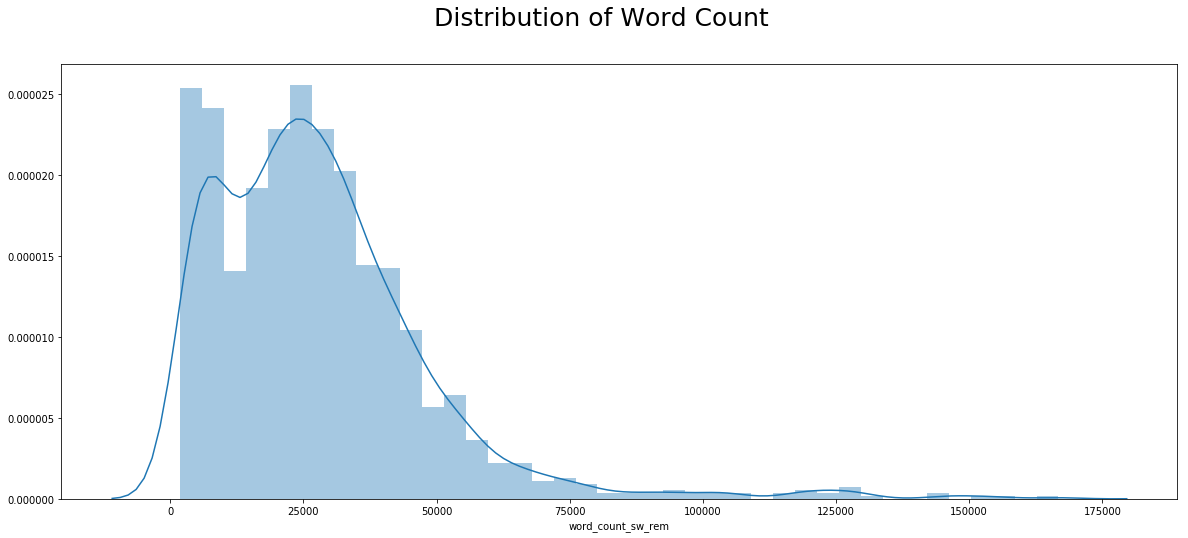

In [35]:
f,ax=plt.subplots(figsize = (20,8))
f.suptitle('Distribution of Word Count', fontsize = 25)
sns.distplot(data['word_count_sw_rem'])

Majority of the word count distribution centers arount 3000 words.

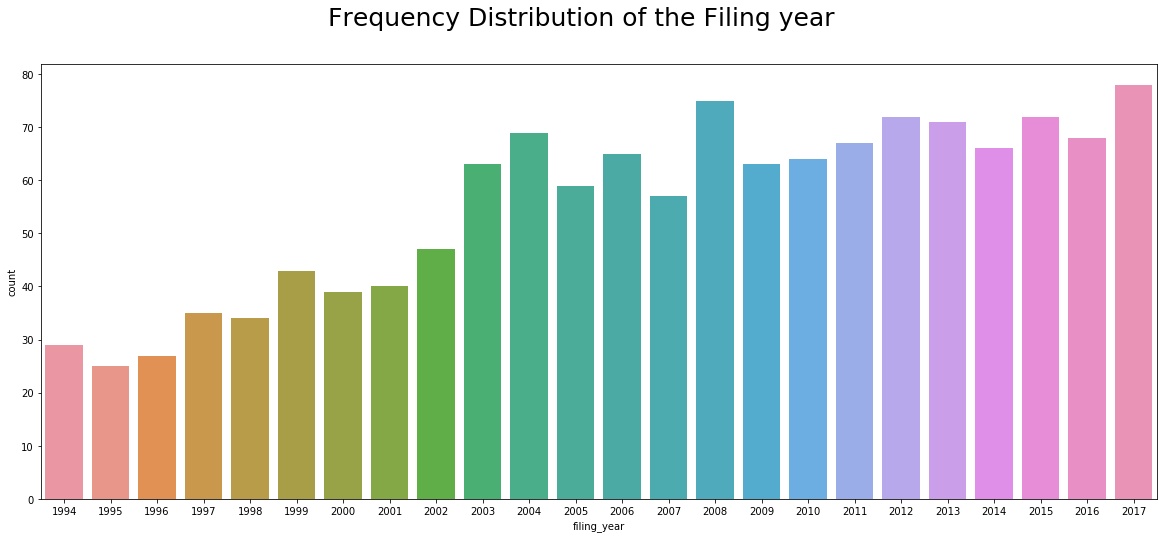

In [36]:
f,ax=plt.subplots(figsize = (20,8))
f.suptitle('Frequency Distribution of the Filing year', fontsize = 25)
sns.countplot(data['filing_year'])

Most 10-K report data is from the years 2008 to 2017.

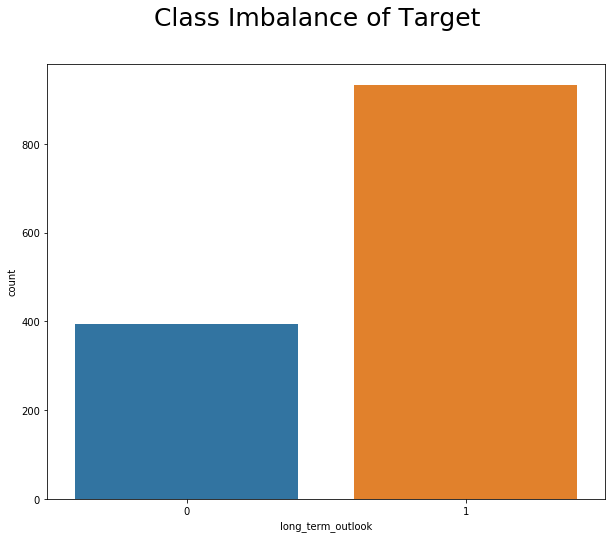

In [37]:
f,ax=plt.subplots(figsize = (10,8))
f.suptitle('Class Imbalance of Target', fontsize = 25)
sns.countplot(data['long_term_outlook'])

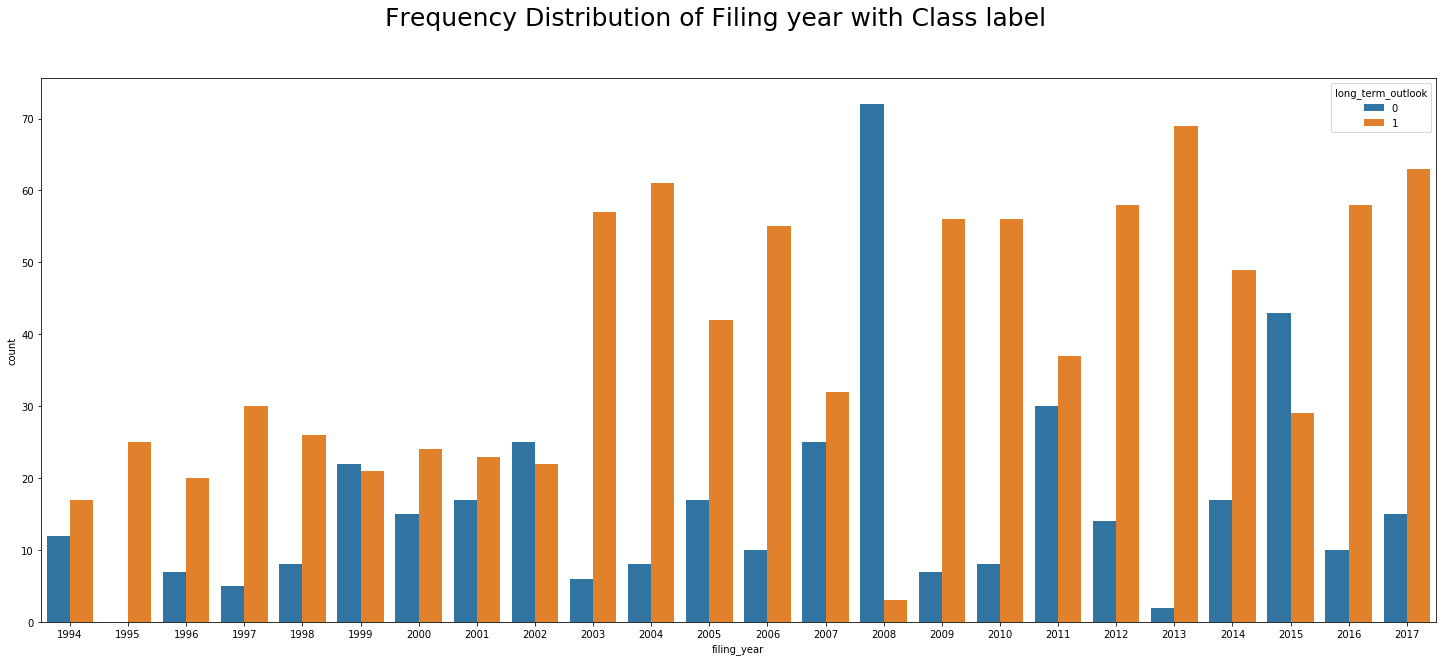

In [38]:
f,ax=plt.subplots(figsize = (25,10))
f.suptitle('Frequency Distribution of Filing year with Class label', fontsize = 25)
sns.countplot(data['filing_year'], hue = data['long_term_outlook'])

The year 2008 shows record maximum of label 0. This is beacause of the 2008 recession.

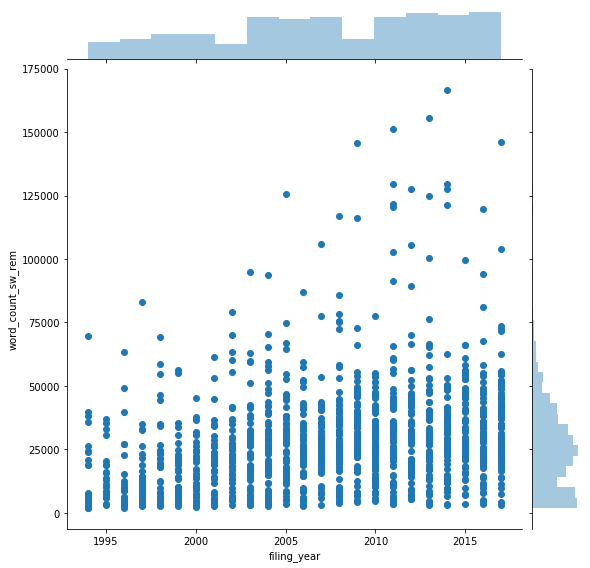

In [39]:
#f,ax=plt.subplots(figsize = (25,10))
f.suptitle('Distribution of filing year with word count', fontsize = 25)
sns.jointplot(x = data['filing_year'], y = data['word_count_sw_rem'], height = 8, ratio = 8)

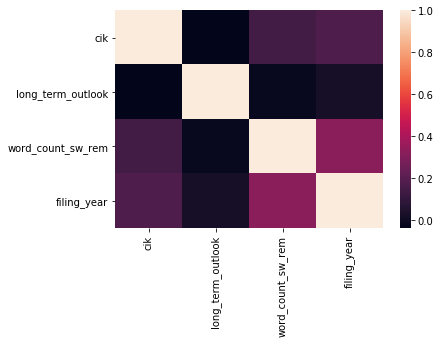

In [40]:
corr = data.corr()

sns.heatmap(corr)

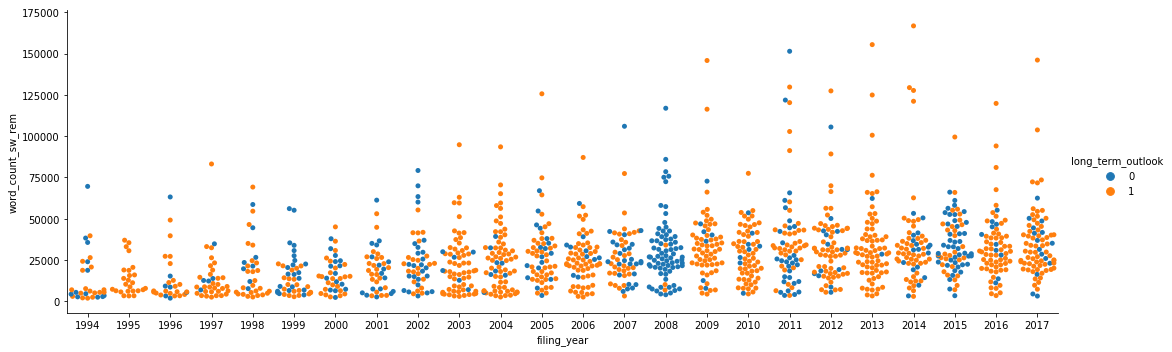

In [41]:
#f,ax=plt.subplots(figsize = (25,10))
#f.suptitle('Frequency Distribution of Filing year with Class label', fontsize = 25)
sns.catplot(x="filing_year", y="word_count_sw_rem", hue="long_term_outlook", kind="swarm", data=data, aspect = 3)

In [42]:
from wordcloud import WordCloud

In [43]:
data['lemma'] = [' '.join(text) for text in data['lemma_data']]

In [45]:
data['lemma'][0]

0    UNITED STATES SECURITIES EXCHANGE COMMISSION W...
0    UNITED STATES SECURITIES EXCHANGE COMMISSION W...
0    UNITED STATES SECURITIES EXCHANGE COMMISSION W...
Name: lemma, dtype: object

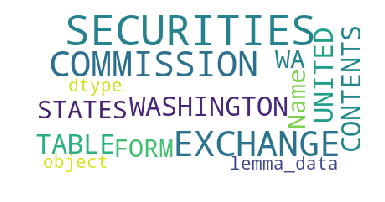

In [46]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(str(data['lemma_data'][10]))
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [47]:
df.dtypes

cik                   int64
filing_date          object
X10k_link            object
long_term_outlook     int64
tenk_data            object
cleaned_data         object
token_data           object
word_count_token      int64
sw_rem_data          object
word_count_sw_rem     int64
lemma_data           object
filing_year           int64
dtype: object

In [48]:
df['tenk_data'][0]

0     \t \t UNITED STATES SECURITIES AND EXCHANGE C...
0     \t \t UNITED STATES SECURITIES AND EXCHANGE C...
0     UNITED STATES SECURITIES AND EXCHANGE COMMISS...
Name: tenk_data, dtype: object

In [49]:
data.to_csv('final_data.csv')